# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data

In [3]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [4]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

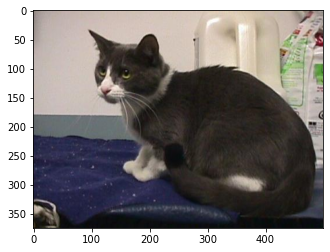

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

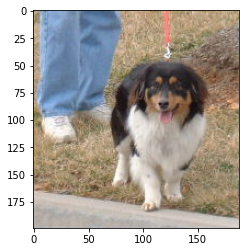

In [8]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1, 
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

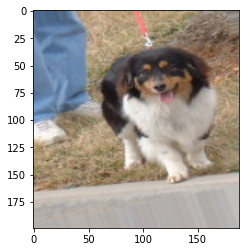

In [12]:
plt.imshow(image_gen.random_transform(dog2))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [13]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [15]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape= image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape= image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [19]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train', 
                                                target_size=image_shape[:2] ,#(150,150)
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:

test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test', 
                                                target_size=image_shape[:2] ,#(150,150)
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
rs = model.fit_generator(train_image_gen,
                        epochs=100,
                        steps_per_epoch=150,
                        validation_data= test_image_gen,
                        validation_steps=12)

Epoch 1/100
150/150 [==============================] - 36s 241ms/step - loss: 0.6899 - accuracy: 0.5542 - val_loss: 0.6965 - val_accuracy: 0.4896
Epoch 2/100
150/150 [==============================] - 43s 290ms/step - loss: 0.6876 - accuracy: 0.5604 - val_loss: 0.6800 - val_accuracy: 0.5885
Epoch 3/100
150/150 [==============================] - 42s 282ms/step - loss: 0.6843 - accuracy: 0.5613 - val_loss: 0.6759 - val_accuracy: 0.6458
Epoch 4/100
150/150 [==============================] - 42s 281ms/step - loss: 0.6836 - accuracy: 0.5604 - val_loss: 0.6703 - val_accuracy: 0.5833
Epoch 5/100
150/150 [==============================] - 43s 284ms/step - loss: 0.6861 - accuracy: 0.5442 - val_loss: 0.6785 - val_accuracy: 0.5573
Epoch 6/100
150/150 [==============================] - 41s 270ms/step - loss: 0.6808 - accuracy: 0.5679 - val_loss: 0.7010 - val_accuracy: 0.5469
Epoch 7/100
150/150 [==============================] - 40s 269ms/step - loss: 0.6767 - accuracy: 0.5696 - val_loss: 0.6880 -

# Evaluating the Model

In [40]:
rs.history['accuracy']

[0.5541666746139526,
 0.5604166388511658,
 0.5612714290618896,
 0.5604166388511658,
 0.5441666841506958,
 0.5679166913032532,
 0.5695833563804626,
 0.5604166388511658,
 0.5805102586746216,
 0.5645833611488342,
 0.5833333134651184,
 0.5670833587646484,
 0.6129166483879089,
 0.628333330154419,
 0.6150000095367432,
 0.6395833492279053,
 0.6166666746139526,
 0.6424999833106995,
 0.6512500047683716,
 0.6600000262260437,
 0.6754166483879089,
 0.6949999928474426,
 0.6620661020278931,
 0.6899999976158142,
 0.6912500262260437,
 0.6949999928474426,
 0.7104166746139526,
 0.702634871006012,
 0.7037500143051147,
 0.6976160407066345,
 0.7080719470977783,
 0.7195833325386047,
 0.7114177942276001,
 0.7225000262260437,
 0.721666693687439,
 0.7245833277702332,
 0.7283333539962769,
 0.731249988079071,
 0.7316666841506958,
 0.750731885433197,
 0.7433333396911621,
 0.7308333516120911,
 0.7570833563804626,
 0.7425000071525574,
 0.7503136992454529,
 0.7400000095367432,
 0.7583333253860474,
 0.742500007152557

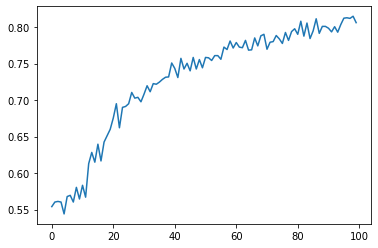

In [41]:
plt.plot(rs.history['accuracy'])

In [42]:
model.save('cat_dog.h5')

In [43]:
from keras.models import load_model


In [44]:
new_model = load_model('cat_dog.h5')

In [64]:
dog_file = '../DATA/CATS_DOGS/test/DOG/10005.jpg'

# Predicting on new images

In [65]:
import numpy as np
from keras.preprocessing import image

In [66]:
dog_img = image.load_img(dog_file, target_size=(150,150))
dog_img = image.img_to_array(dog_img)


In [67]:
dog_img.shape

(150, 150, 3)

In [68]:
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [69]:
dog_img = dog_img/255

In [70]:
model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [71]:
model.predict(dog_img)

array([[0.87782454]], dtype=float32)